# Load data

## Libraries

In [1]:
%matplotlib inline 

# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt     # for plotting

import statsmodels.api as sm    # StatsModels

# StatsModels bug-fix
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

C:\Users\mshin\Anaconda3\envs\econ142\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load data

In [2]:
# Data file
data = 'math_10.out'

# Data types
col_dtypes = {
    'c10_zmath': float,
    'wgt10_math': float,
    'sat': int,
    'constant': int,
    'c08_zlang': float,
    'c08_zmath': float,
    'feeder_school': int,
    'm_id_pairs': int
}

# read csv
df = pd.read_csv(data,
                 dtype=col_dtypes,
                 na_values='',
                 engine='c',
                 sep='\t',
                 encoding='utf-8')

# Construct a list of all matched SAT-CEB village pairs in the dataset
included_pairs = sorted(df['m_id_pairs'].unique())

# Question 1

In [3]:
# Form dummies for included matched SAT/CEB pairs
pair_dums = pd.get_dummies(df['m_id_pairs'].astype('category'), 
                           prefix='mp')

# Concatenate matched pair dummies onto dataframe
df = pd.concat([df, pair_dums], axis=1)

# Question 2

In [4]:
# Construct outcome vector, design matrix and test instrument inverse weights
Y = df['c08_zmath']     # outcome
test_wgt = 1. / df['wgt10_math']    # test instrument weights
X = df[['constant', 'sat']]     # design matrix

# omit last matched pair to avoid dummy variable trap
X = pd.concat([X, pair_dums.iloc[:, 0:-1]], axis=1)

# Compute weighted least squares fit
# NOTE: cluster-robust standard errors
wls = sm.WLS(Y, X, weights=test_wgt)\
    .fit(cov_type='cluster',
         cov_kwds={'groups': df['feeder_school']},
         use_t=True)
wls.summary()

<table class="simpletable">
<caption>WLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>c08_zmath</td>    <th>  R-squared:         </th> <td>   0.238</td>
</tr>
<tr>
  <th>Model:</th>                   <td>WLS</td>       <th>  Adj. R-squared:    </th> <td>   0.193</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   218.0</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 16 Feb 2018</td> <th>  Prob (F-statistic):</th> <td>1.39e-66</td>
</tr>
<tr>
  <th>Time:</th>                 <td>16:33:55</td>     <th>  Log-Likelihood:    </th> <td> -965.57</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   713</td>      <th>  AIC:               </th> <td>   2013.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   672</td>      <th>  BIC:               </th> <td>   2200.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    40</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>       <td>cluster</td>     <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>        <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>constant</th> <td>   -0.2664</td> <td>    0.382</td> <td>   -0.697</td> <td> 0.488</td> <td>   -1.027</td> <td>    0.494</td>
</tr>
<tr>
  <th>sat</th>      <td>    0.0416</td> <td>    0.116</td> <td>    0.358</td> <td> 0.721</td> <td>   -0.190</td> <td>    0.273</td>
</tr>
<tr>
  <th>mp_2</th>     <td>    0.1473</td> <td>    0.456</td> <td>    0.323</td> <td> 0.747</td> <td>   -0.760</td> <td>    1.054</td>
</tr>
<tr>
  <th>mp_3</th>     <td>    1.2714</td> <td>    0.384</td> <td>    3.307</td> <td> 0.001</td> <td>    0.506</td> <td>    2.036</td>
</tr>
<tr>
  <th>mp_6</th>     <td>    0.3375</td> <td>    0.439</td> <td>    0.769</td> <td> 0.444</td> <td>   -0.536</td> <td>    1.211</td>
</tr>
<tr>
  <th>mp_7</th>     <td>    0.0137</td> <td>    0.384</td> <td>    0.036</td> <td> 0.972</td> <td>   -0.750</td> <td>    0.778</td>
</tr>
<tr>
  <th>mp_9</th>     <td>    0.4265</td> <td>    0.394</td> <td>    1.082</td> <td> 0.283</td> <td>   -0.358</td> <td>    1.211</td>
</tr>
<tr>
  <th>mp_10</th>    <td>    0.7381</td> <td>    0.410</td> <td>    1.801</td> <td> 0.076</td> <td>   -0.078</td> <td>    1.554</td>
</tr>
<tr>
  <th>mp_12</th>    <td>    0.6417</td> <td>    0.783</td> <td>    0.820</td> <td> 0.415</td> <td>   -0.917</td> <td>    2.200</td>
</tr>
<tr>
  <th>mp_13</th>    <td>    0.8942</td> <td>    0.381</td> <td>    2.345</td> <td> 0.022</td> <td>    0.135</td> <td>    1.653</td>
</tr>
<tr>
  <th>mp_15</th>    <td>    0.9155</td> <td>    0.432</td> <td>    2.120</td> <td> 0.037</td> <td>    0.056</td> <td>    1.775</td>
</tr>
<tr>
  <th>mp_16</th>    <td>   -0.3223</td> <td>    0.478</td> <td>   -0.674</td> <td> 0.502</td> <td>   -1.275</td> <td>    0.630</td>
</tr>
<tr>
  <th>mp_17</th>    <td>    0.1861</td> <td>    0.377</td> <td>    0.493</td> <td> 0.623</td> <td>   -0.565</td> <td>    0.937</td>
</tr>
<tr>
  <th>mp_18</th>    <td>   -1.0858</td> <td>    0.378</td> <td>   -2.872</td> <td> 0.005</td> <td>   -1.838</td> <td>   -0.333</td>
</tr>
<tr>
  <th>mp_19</th>    <td>   -0.2624</td> <td>    0.377</td> <td>   -0.695</td> <td> 0.489</td> <td>   -1.013</td> <td>    0.489</td>
</tr>
<tr>
  <th>mp_20</th>    <td>    0.5475</td> <td>    0.635</td> <td>    0.862</td> <td> 0.391</td> <td>   -0.717</td> <td>    1.812</td>
</tr>
<tr>
  <th>mp_21</th>    <td>   -0.2590</td> <td>    0.532</td> <td>   -0.487</td> <td> 0.627</td> <td>   -1.317</td> <td>    0.799</td>
</tr>
<tr>
  <th>mp_22</th>    <td>    0.5116</td> <td>    0.396</td> <td>    1.293</td> <td> 0.200</td> <td>   -0.276</td> <td>    1.299</td>
</tr>
<tr>
  <th>mp_23</th>    <td>   -0.3545</td> <td>    0.386</td> <td>   -0.920</td> <td> 0.361</td> <td>   -1.122</td> <td>    0.413</td>
</tr

 - The coefficient on *sat* is 0.0416, and it is not significant even at the 10 percent level. We can conclude that at 2008 baseline, children in SAT villages and in CEB villages had no significant difference in math test scores.
 - Some of the children dropped out of school and had to be located at their home. Since those who dropped out were not randomly sampled, we can account for this sampling by assigning different weights. In the paper, the authors assigned a weight of 2 to those were located at home, and 1 to the rest.

# Question 3

In [5]:
# now independent variable is c10_zmath
Y = df['c10_zmath']

# WLS
wls = sm.WLS(Y, X, weights=test_wgt).\
    fit(cov_type='cluster',
        cov_kwds={'groups': df['feeder_school']},
        use_t=True)
wls.summary()

<table class="simpletable">
<caption>WLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>c10_zmath</td>    <th>  R-squared:         </th> <td>   0.146</td>
</tr>
<tr>
  <th>Model:</th>                   <td>WLS</td>       <th>  Adj. R-squared:    </th> <td>   0.095</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   48.02</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 16 Feb 2018</td> <th>  Prob (F-statistic):</th> <td>2.02e-41</td>
</tr>
<tr>
  <th>Time:</th>                 <td>16:33:55</td>     <th>  Log-Likelihood:    </th> <td> -1067.3</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   713</td>      <th>  AIC:               </th> <td>   2217.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   672</td>      <th>  BIC:               </th> <td>   2404.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    40</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>       <td>cluster</td>     <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>        <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>constant</th> <td>   -0.1922</td> <td>    0.206</td> <td>   -0.934</td> <td> 0.353</td> <td>   -0.602</td> <td>    0.218</td>
</tr>
<tr>
  <th>sat</th>      <td>    0.1547</td> <td>    0.099</td> <td>    1.560</td> <td> 0.123</td> <td>   -0.043</td> <td>    0.352</td>
</tr>
<tr>
  <th>mp_2</th>     <td>    0.0426</td> <td>    0.224</td> <td>    0.191</td> <td> 0.849</td> <td>   -0.402</td> <td>    0.488</td>
</tr>
<tr>
  <th>mp_3</th>     <td>    0.9798</td> <td>    0.226</td> <td>    4.334</td> <td> 0.000</td> <td>    0.530</td> <td>    1.430</td>
</tr>
<tr>
  <th>mp_6</th>     <td>    0.8838</td> <td>    0.211</td> <td>    4.197</td> <td> 0.000</td> <td>    0.465</td> <td>    1.303</td>
</tr>
<tr>
  <th>mp_7</th>     <td>    0.4992</td> <td>    0.314</td> <td>    1.589</td> <td> 0.116</td> <td>   -0.126</td> <td>    1.125</td>
</tr>
<tr>
  <th>mp_9</th>     <td>    1.0689</td> <td>    0.243</td> <td>    4.398</td> <td> 0.000</td> <td>    0.585</td> <td>    1.553</td>
</tr>
<tr>
  <th>mp_10</th>    <td>    0.2537</td> <td>    0.334</td> <td>    0.759</td> <td> 0.450</td> <td>   -0.411</td> <td>    0.919</td>
</tr>
<tr>
  <th>mp_12</th>    <td>    0.5964</td> <td>    0.297</td> <td>    2.009</td> <td> 0.048</td> <td>    0.006</td> <td>    1.187</td>
</tr>
<tr>
  <th>mp_13</th>    <td>    0.9082</td> <td>    0.195</td> <td>    4.661</td> <td> 0.000</td> <td>    0.520</td> <td>    1.296</td>
</tr>
<tr>
  <th>mp_15</th>    <td>    0.7975</td> <td>    0.219</td> <td>    3.637</td> <td> 0.000</td> <td>    0.361</td> <td>    1.234</td>
</tr>
<tr>
  <th>mp_16</th>    <td>    0.3924</td> <td>    0.205</td> <td>    1.915</td> <td> 0.059</td> <td>   -0.015</td> <td>    0.800</td>
</tr>
<tr>
  <th>mp_17</th>    <td>    0.4594</td> <td>    0.203</td> <td>    2.267</td> <td> 0.026</td> <td>    0.056</td> <td>    0.863</td>
</tr>
<tr>
  <th>mp_18</th>    <td>   -0.6551</td> <td>    0.239</td> <td>   -2.743</td> <td> 0.008</td> <td>   -1.130</td> <td>   -0.180</td>
</tr>
<tr>
  <th>mp_19</th>    <td>    0.6984</td> <td>    0.278</td> <td>    2.512</td> <td> 0.014</td> <td>    0.145</td> <td>    1.252</td>
</tr>
<tr>
  <th>mp_20</th>    <td>    0.9563</td> <td>    0.287</td> <td>    3.333</td> <td> 0.001</td> <td>    0.385</td> <td>    1.527</td>
</tr>
<tr>
  <th>mp_21</th>    <td>    0.1826</td> <td>    0.672</td> <td>    0.272</td> <td> 0.787</td> <td>   -1.155</td> <td>    1.520</td>
</tr>
<tr>
  <th>mp_22</th>    <td>    0.0197</td> <td>    0.246</td> <td>    0.080</td> <td> 0.936</td> <td>   -0.469</td> <td>    0.509</td>
</tr>
<tr>
  <th>mp_23</th>    <td>    0.2060</td> <td>    0.317</td> <td>    0.650</td> <td> 0.517</td> <td>   -0.425</td> <td>    0.837</td>
</tr

 - The coefficient on *sat* is 0.1547, but it is not significant even at the 10 percent level. We cannot conclude that residing in a SAT village resulted in higher 2010 math test scores than residing in a CEB village. This is the first specifictation that was used in the paper.

# Question 4

In [6]:
# additional control for c08_zmath, c08_zlang
X = pd.concat([X, df[['c08_zmath', 'c08_zlang']]], axis=1)

# WLS
wls = sm.WLS(Y, X, weights=test_wgt)\
    .fit(cov_type='cluster',
         cov_kwds={'groups': df['feeder_school']},
         use_t=True)
wls.summary()

<table class="simpletable">
<caption>WLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>c10_zmath</td>    <th>  R-squared:         </th> <td>   0.462</td>
</tr>
<tr>
  <th>Model:</th>                   <td>WLS</td>       <th>  Adj. R-squared:    </th> <td>   0.429</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   69.49</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 16 Feb 2018</td> <th>  Prob (F-statistic):</th> <td>8.57e-48</td>
</tr>
<tr>
  <th>Time:</th>                 <td>16:33:56</td>     <th>  Log-Likelihood:    </th> <td> -902.26</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   713</td>      <th>  AIC:               </th> <td>   1891.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   670</td>      <th>  BIC:               </th> <td>   2087.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    42</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>       <td>cluster</td>     <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>constant</th>  <td>    0.0319</td> <td>    0.055</td> <td>    0.579</td> <td> 0.564</td> <td>   -0.078</td> <td>    0.142</td>
</tr>
<tr>
  <th>sat</th>       <td>    0.1342</td> <td>    0.082</td> <td>    1.636</td> <td> 0.106</td> <td>   -0.029</td> <td>    0.297</td>
</tr>
<tr>
  <th>mp_2</th>      <td>   -0.1218</td> <td>    0.246</td> <td>   -0.495</td> <td> 0.622</td> <td>   -0.612</td> <td>    0.368</td>
</tr>
<tr>
  <th>mp_3</th>      <td>   -0.0918</td> <td>    0.087</td> <td>   -1.059</td> <td> 0.293</td> <td>   -0.264</td> <td>    0.081</td>
</tr>
<tr>
  <th>mp_6</th>      <td>    0.6063</td> <td>    0.276</td> <td>    2.198</td> <td> 0.031</td> <td>    0.057</td> <td>    1.155</td>
</tr>
<tr>
  <th>mp_7</th>      <td>    0.4544</td> <td>    0.165</td> <td>    2.758</td> <td> 0.007</td> <td>    0.126</td> <td>    0.782</td>
</tr>
<tr>
  <th>mp_9</th>      <td>    0.7510</td> <td>    0.048</td> <td>   15.508</td> <td> 0.000</td> <td>    0.655</td> <td>    0.847</td>
</tr>
<tr>
  <th>mp_10</th>     <td>   -0.3037</td> <td>    0.112</td> <td>   -2.703</td> <td> 0.008</td> <td>   -0.527</td> <td>   -0.080</td>
</tr>
<tr>
  <th>mp_12</th>     <td>    0.2819</td> <td>    0.239</td> <td>    1.180</td> <td> 0.242</td> <td>   -0.194</td> <td>    0.757</td>
</tr>
<tr>
  <th>mp_13</th>     <td>    0.2218</td> <td>    0.097</td> <td>    2.296</td> <td> 0.024</td> <td>    0.030</td> <td>    0.414</td>
</tr>
<tr>
  <th>mp_15</th>     <td>    0.2058</td> <td>    0.049</td> <td>    4.194</td> <td> 0.000</td> <td>    0.108</td> <td>    0.303</td>
</tr>
<tr>
  <th>mp_16</th>     <td>    0.5164</td> <td>    0.263</td> <td>    1.965</td> <td> 0.053</td> <td>   -0.007</td> <td>    1.039</td>
</tr>
<tr>
  <th>mp_17</th>     <td>    0.3471</td> <td>    0.071</td> <td>    4.858</td> <td> 0.000</td> <td>    0.205</td> <td>    0.489</td>
</tr>
<tr>
  <th>mp_18</th>     <td>    0.1698</td> <td>    0.133</td> <td>    1.272</td> <td> 0.207</td> <td>   -0.096</td> <td>    0.435</td>
</tr>
<tr>
  <th>mp_19</th>     <td>    0.7460</td> <td>    0.209</td> <td>    3.566</td> <td> 0.001</td> <td>    0.330</td> <td>    1.162</td>
</tr>
<tr>
  <th>mp_20</th>     <td>    0.4745</td> <td>    0.167</td> <td>    2.849</td> <td> 0.006</td> <td>    0.143</td> <td>    0.806</td>
</tr>
<tr>
  <th>mp_21</th>     <td>    0.2258</td> <td>    0.404</td> <td>    0.560</td> <td> 0.577</td> <td>   -0.577</td> <td>    1.029</td>
</tr>
<tr>
  <th>mp_22</th>     <td>   -0.4286</td> <td>    0.162</td> <td>   -2.645</td> <td> 0.010</td> <td>   -0.751</td> <td>   -0.106</td>
</tr>
<tr>
  <th>mp_23</th>     <td>    0.3738</td> <td>    0.161</td> <td>    2.321</td> <td> 0.023</td> <td>    0.053</td> <td

 - The coefficient on *sat* is 0.1342, but it is not significant even at the 10 percent level. When including student controls, *c08_zmath* and *c08_zlang*, we cannot conlcude that residing in a SAT village resulted in higher 2010 math test scores than residing in a CEB village. In the paper, this is the first specifictation with student controls.

# Question 5

Optimization terminated successfully.
         Current function value: 0.627957
         Iterations 6


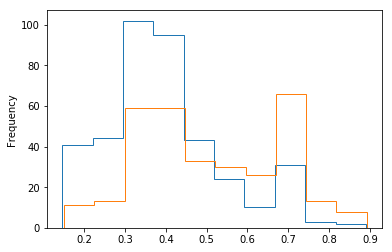

In [7]:
# design matrix
X = pd.concat([df.constant, 
               df.c08_zmath, 
               df.c08_zlang, 
               pair_dums.iloc[:, 0:-1]],
              axis=1)

# logistic regression
logit = sm.Logit(df['sat'], X)
logit_results = logit.fit()
logit_results.summary()

# Fitted propensity score values
df['propensity'] = logit_results.fittedvalues.apply(
    lambda v: math.exp(v) / (1 + math.exp(v))
)

# histogram
plt.figure()
df[df.sat == 0].propensity.plot.hist(histtype='step')
df[df.sat == 1].propensity.plot.hist(histtype='step')

 - X-axis is propensity score, and blue and orange lines represent propensity scores of children in CEB and SAT villages, respectively.
 - As shown in the histograms above, in every bin of propensity score, we have both SAT and CEB population. Therefore, the overlap condition is satisfied.

# Question 6

In [8]:
# IPW weights
df['ipw_weight'] = df.apply(
    lambda row: row.sat / row.propensity 
                + (1 - row.sat) / (1 - row.propensity),
    axis=1
)

# Multiply weights by test_wgt
df.ipw_weight = test_wgt * df['ipw_weight']

# WLS
wls_ipw = sm.WLS(df['c10_zmath'],
                 df[['constant', 'sat']],
                 weights=df.ipw_weight
                 ).fit(cov_type='cluster',
                       cov_kwds={'groups': df['feeder_school']},
                       use_t=True)

wls_ipw.summary()

<table class="simpletable">
<caption>WLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>c10_zmath</td>    <th>  R-squared:         </th> <td>   0.005</td>
</tr>
<tr>
  <th>Model:</th>                   <td>WLS</td>       <th>  Adj. R-squared:    </th> <td>   0.004</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   1.251</td>
</tr>
<tr>
  <th>Date:</th>             <td>Fri, 16 Feb 2018</td> <th>  Prob (F-statistic):</th>  <td> 0.267</td> 
</tr>
<tr>
  <th>Time:</th>                 <td>16:33:57</td>     <th>  Log-Likelihood:    </th> <td> -1148.0</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   713</td>      <th>  AIC:               </th> <td>   2300.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   711</td>      <th>  BIC:               </th> <td>   2309.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>       <td>cluster</td>     <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>        <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>constant</th> <td>    0.2835</td> <td>    0.092</td> <td>    3.068</td> <td> 0.003</td> <td>    0.100</td> <td>    0.467</td>
</tr>
<tr>
  <th>sat</th>      <td>    0.1602</td> <td>    0.143</td> <td>    1.119</td> <td> 0.267</td> <td>   -0.125</td> <td>    0.445</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 9.222</td> <th>  Durbin-Watson:     </th> <td>   1.628</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.010</td> <th>  Jarque-Bera (JB):  </th> <td>   9.186</td>
</tr>
<tr>
  <th>Skew:</th>          <td>-0.261</td> <th>  Prob(JB):          </th> <td>  0.0101</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 3.193</td> <th>  Cond. No.          </th> <td>    2.71</td>
</tr>
</table>

 - By using the Inverse Probability Weighting, we can account for how different covariates are distributed between the treatment and control groups. It corrects our estimate by up-weighting under-represented treated units in treatment and control groups, potentially reducing the bias of our estimate of the average treatment effect.
 - The coefficient on *sat* is 0.1602, and it is not significant even at the 10 percent level. We cannot conclude that residing in a SAT village resulted in higher 2010 math test scores than residing in a CEB village. In the paper, this is the second specifictation.

# Question 7

 - By studying the children for longer period of time, one can obtain more interesting data, such as high school/college enrollment and adulthood wage. These data would make it possible to estimate not only the short-term effects, but also the long-term effects of SAT and CEB schools.
 - More data on school-level peer composition, such as average parental income and schooling years, would be helpful. The paper uses mean of baseline composite test score as a proxy for peer composition. SInce peer pressure is one of the important factors in determining student achievement, these data can potentially provide insights into why SATs and CEBs show different effectiveness.